# Dynamic Manning Report - Doctor Data

VADM Burke, Chief of Naval Personnel, ordered LTJGs Dannelly, Calcagno, Shaw, and Kuzma to build a prototype of a job-seeker / job-owner matching algorithm in one month to aid personnel detailing. This report offers an overview of the team’s results utilizing medical corps data provided by CDR Gingo. 

In [165]:
#Data Ingestion
#Import Libraries
import pandas as pd
import pref_metrics as pm

#Path to files
file_path_data = '/Users/z/Documents/Data_Cleaning/med_data/clean/'
file_path_results = '/Users/z/Documents/Data_Cleaning/med_data/clean/results/'

#Raw Data
s_df = pd.read_csv(file_path_data + "S.csv", index_col=0)
o_df = pd.read_csv(file_path_data + "O.csv", index_col=0)
a_df = pd.read_csv(file_path_data + "A.csv", index_col=0)
x_tn_df = pd.read_csv(file_path_data + "X.csv", index_col=0)


#Match Dataframes
x_MIP_df = pd.read_csv(file_path_results + "X_mip.csv", index_col=0)
x_da_s_df = pd.read_csv(file_path_results + "X_da_s.csv", index_col=0)
x_da_o_df = pd.read_csv(file_path_results + "X_da_o.csv", index_col=0)

#Similarity Dataframes
sim_s_df = pd.read_csv(file_path_results + "Similarity_s.csv", index_col=0)
sim_o_df = pd.read_csv(file_path_results + "Similarity_o.csv", index_col=0)

#Post Match Stats
post_stat_df = pd.read_csv(file_path_results + "post_match.csv",index_col=0)


#Metrics Dataframes
metrics_s_df = pd.read_csv(file_path_results + "Metrics_s.csv", index_col=0)
metrics_o_df = pd.read_csv(file_path_results + "Metrics_o.csv", index_col=0)

#Correlation Dataframes
corr_s_df = pd.read_csv(file_path_results + "Corr_s.csv", index_col=0)
corr_o_df = pd.read_csv(file_path_results + "Corr_o.csv", index_col=0)

#Air Force Status Quo Metrics
af_metrics = pd.DataFrame([.21, .42, .55], index=["Assigned 1st Pref", "Assigned Top 5 Pref", "Assigned Top 10 Pref"])

#Add in totals
total_1 = (post_stat_df.T["1_o_count"] + post_stat_df.T["1_s_count"])
total_5 = (post_stat_df.T["5_o_count"] + post_stat_df.T["5_s_count"]).rename("Ratio 5")
total_10 = (post_stat_df.T["10_o_count"] + post_stat_df.T["10_s_count"]).rename("Ratio 10")
total_participants = post_stat_df.T["o_participants"] + post_stat_df.T["s_participants"]

ratio_1 = (total_1 / total_participants).rename("Total 1 Ratio")
ratio_5 = (total_5 / total_participants).rename("Total 5 Ratio")
ratio_10 = (total_10 / total_participants).rename("Total 10 Ratio")


post_stat_df = post_stat_df.append([ratio_1,ratio_5,ratio_10])

In [166]:
import plotly.plotly as py
import plotly.graph_objs as go

plot_metrics = post_stat_df.iloc[[50, 51, 52], :]

plot_metrics.index = ["Assigned 1st Pref", "Assigned Top 5 Pref", "Assigned Top 10 Pref"]

data = [
    go.Bar(
        x=af_metrics.index, # assign x as the dataframe column 'x'
        y=af_metrics[0],
        name = "Detailing Standard"
    ),
    go.Bar(
        x=plot_metrics.index, # assign x as the dataframe column 'x'
        y=plot_metrics["da_s"],
        name = "Differed Acceptance"
    ),
    go.Bar(
        x=plot_metrics.index, # assign x as the dataframe column 'x'
        y=plot_metrics["mip"],
        name = "Mixed Integer Algo"
    )
]

layout = go.Layout(
    barmode='group',
    title='Overall Preference Allocation',
    yaxis=dict(
        tickformat='%d'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='pandas-bar-chart-layout')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dannellyz/0 or inside your plot.ly account where it is named 'pandas-bar-chart-layout'


In [158]:
fig = {
    'data': [
      {
      'x': metrics_s_df.Specialization, 
            'y': metrics_s_df.Competitiveness, 
            'text': metrics_s_df.index, 
            'mode': 'markers', 
            'name': 'Sailors'}
    ],
    'layout': {
        'xaxis': {'title': 'Spec', 'type': 'log'},
        'yaxis': {'title': "Comp"}
    }
}

# IPython notebook
py.iplot(fig, filename='out')

In [217]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": [16, 15, 12],
      "labels": [
        "first",
        "top5",
        "rest"
      ],
      'domain': {'x': [0, .5], 'y': [.52, 1]},
      "name": "1",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Global Emissions 1990-2011",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "DA-O",
                "x": 0.22,
                "y": 0.20
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [284]:
O_comp = {}
for key, value in match_dict.items():
    total_comp = 0
    for item in value:
        total_comp += metrics_s_df.at[item,"Competitiveness"]
    O_comp[key] = total_comp
O_comp

{'command_A': 0.39634146341463183,
 'command_B': 0.17682926829268408,
 'command_C': 0.737804878048775,
 'command_D': 0.7926829268292704,
 'command_E': 2.0426829268292703,
 'command_F': 0.7926829268292704,
 'command_G': 0.7926829268292704,
 'command_H': 3.3292682926829316,
 'command_I': 0.4817073170731727,
 'command_J': 0.7134146341463387,
 'command_K': 1.0792682926829318,
 'command_L': 1.347560975609759,
 'command_M': 0.9390243902438955,
 'command_N': 1.0121951219512115,
 'command_O': 1.817073170731707,
 'command_P': 0.6951219512195114,
 'command_Q': 1.5365853658536546,
 'command_R': 0.7317073170731727,
 'command_S': 0.8963414634146318,
 'command_T': 1.6768292682926773}

In [290]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": list(O_comp.values()),
      "labels": list(O_comp.keys()),
      "name": "1",
      "hoverinfo":"label+percent+name",
      "type": "pie"
    }],
  "layout": {
        "title":"Talent Allocation: Cumulative Competitiveness "
    }
}
py.iplot(fig, filename='donut')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='4a4535a4-5891-4d1a-9821-7ad2c2f3899d', precision=5, show_toolbar=True)

In [109]:
lista = list(post_stat_df.index)
lista.index("Total 1 Ratio")

50

In [111]:
(x_da_s_df * s_df).sum().sum()

215.0

In [112]:
(x_tn_df * s_df).sum().sum()

82.0

In [113]:
(x_tn_df.T * o_df).sum().sum()

142.0

In [114]:
(x_da_s_df.T * o_df).sum().sum()

609.0

In [115]:
post_stat_df

,mip,da_s,da_o
10_o_count,47.000000,14.000000,15.000000
10_o_ratio,0.824600,0.245600,0.263200
10_s_count,47.000000,51.000000,51.000000
10_s_ratio,0.796600,0.864400,0.864400
15_o_count,52.000000,20.000000,19.000000
15_o_ratio,0.912300,0.350900,0.333300
15_s_count,52.000000,52.000000,52.000000
15_s_ratio,0.881400,0.881400,0.881400
1_o_count,10.000000,2.000000,2.000000
1_o_ratio,0.175400,0.035100,0.035100


In [119]:
import qgrid
widget = qgrid.show_grid(metrics_s_df, show_toolbar=True)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='a0767be4-4893-4d5d-9314-174c03e683dd', precision=5, show_toolbar=True)

In [120]:
import qgrid
widget = qgrid.show_grid(metrics_o_df, show_toolbar=True)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='45cbe022-a3fc-4371-87af-c7a315f90020', precision=5, show_toolbar=True)

In [152]:
spec = (s_df.kurtosis(axis=1) * s_df.skew(axis=1)) * -1
spec_norm = (spec - spec.min()) / (spec.max() - spec.min())
spec_norm.to_dict()

{'command_A': 0.8983946288986753,
 'command_B': 0.037481855683442616,
 'command_C': 1.0,
 'command_D': 0.0882695876065306,
 'command_E': 0.04188844017111805,
 'command_F': 0.12173094126643577,
 'command_G': 0.11852721102022282,
 'command_H': 0.03889895454607275,
 'command_I': 0.35217421047484104,
 'command_J': 0.06420112272561607,
 'command_K': 0.21166497344621502,
 'command_L': 0.05046677647450945,
 'command_M': 0.02252225846129968,
 'command_N': 0.0,
 'command_O': 0.10233853969328732,
 'command_P': 0.0681366046878145,
 'command_Q': 0.05733237918448317,
 'command_R': 0.06118144705920804,
 'command_S': 0.049897559080724296,
 'command_T': 0.05309732279165426}

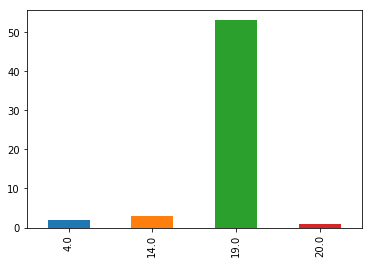

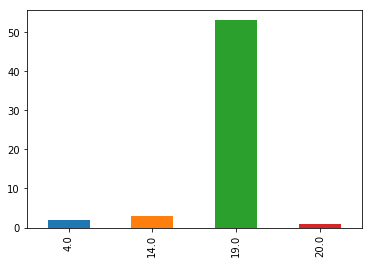

In [135]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
s_df.T['command_A'].value_counts().sort_index().plot(ax=ax, kind='bar')
fig

In [153]:
pd.set_option('display.max_columns', len(s_df.columns))
o_df

,command_A,command_B,command_C,command_D,command_E,command_F,command_G,command_H,command_I,command_J,command_K,command_L,command_M,command_N,command_O,command_P,command_Q,command_R,command_S,command_T
officer_01,19.0,26.0,19.0,19.0,24.0,19.0,19.0,24.0,19.0,20.0,2.0,28.0,27.0,25.0,22.0,2.0,6.0,20.0,24.0,21.0
officer_02,18.0,25.0,18.0,18.0,23.0,18.0,18.0,1.0,18.0,3.0,19.0,26.0,26.0,23.0,20.0,20.0,2.0,19.0,23.0,20.0
officer_03,54.0,54.0,54.0,54.0,52.0,53.0,52.0,55.0,55.0,55.0,54.0,12.0,54.0,55.0,55.0,54.0,55.0,55.0,55.0,55.0
officer_04,34.0,9.0,34.0,35.0,37.0,35.0,35.0,34.0,33.0,34.0,35.0,40.0,40.0,3.0,34.0,35.0,37.0,35.0,36.0,36.0
officer_05,25.0,13.0,25.0,25.0,29.0,25.0,25.0,10.0,25.0,26.0,25.0,32.0,33.0,30.0,27.0,27.0,31.0,25.0,5.0,27.0
officer_06,23.0,29.0,23.0,23.0,28.0,23.0,23.0,27.0,23.0,24.0,22.0,10.0,30.0,29.0,2.0,25.0,5.0,23.0,27.0,25.0
officer_07,11.0,22.0,10.0,11.0,15.0,4.0,4.0,17.0,3.0,8.0,12.0,20.0,22.0,17.0,15.0,13.0,23.0,12.0,15.0,15.0
officer_08,45.0,47.0,45.0,46.0,47.0,45.0,45.0,44.0,45.0,47.0,46.0,50.0,48.0,2.0,41.0,45.0,44.0,47.0,45.0,48.0
officer_10,30.0,32.0,29.0,30.0,31.0,27.0,27.0,31.0,27.0,2.0,28.0,37.0,38.0,35.0,32.0,7.0,33.0,27.0,33.0,30.0
officer_11,44.0,49.0,44.0,43.0,2.0,43.0,44.0,47.0,46.0,45.0,44.0,46.0,49.0,48.0,46.0,44.0,46.0,46.0,47.0,46.0


In [160]:
o_df.pow(2).values

array([[ 361.,  676.,  361., ...,  400.,  576.,  441.],
       [ 324.,  625.,  324., ...,  361.,  529.,  400.],
       [2916., 2916., 2916., ..., 3025., 3025., 3025.],
       ...,
       [3249., 3249., 3249., ..., 3364., 3249., 3364.],
       [3364., 3364., 3364., ..., 3249., 3364., 3249.],
       [3481., 3481., 3481., ..., 3481., 3481., 3481.]])